In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage import exposure
from skimage import io
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
import radiomics
from skimage.filters import rank
from skimage.filters.rank import median
from scipy.interpolate import RectBivariateSpline
from skimage.feature import greycomatrix, greycoprops
from skimage import img_as_uint
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import morphology
import matplotlib.pyplot as plt
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import data, segmentation
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_mean
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import measure
import pandas as pd

In [2]:
###importing whole database
import os, fnmatch
import numpy as np
listOfFiles = os.listdir('.')  
pattern = "*.png"  
g1=[]
for entry in listOfFiles:  
    if fnmatch.fnmatch(entry, pattern):
        g = entry
        g1.append(g)
        
        
num = len(g1)
print('num=',num)

num= 7


g1

In [3]:
g1

['stage_3.png',
 'stage_5.png',
 'stage_7.png',
 'stage_1.png',
 'stage_6.png',
 'stage_4.png',
 'stage_2.png']

In [4]:
# Preprocessing
def plot_images(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    img_gray = rgb2gray(x)
    
    plt.imshow(x)
    plt.title('original image')

    plt.axis('off')
    plt.show()
    return 

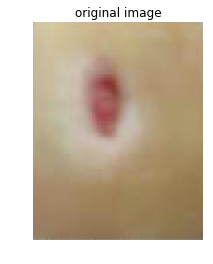

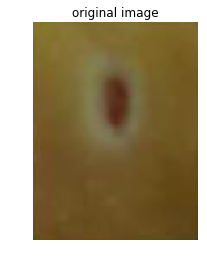

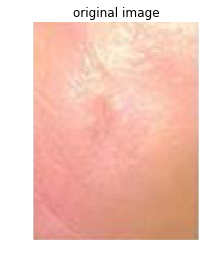

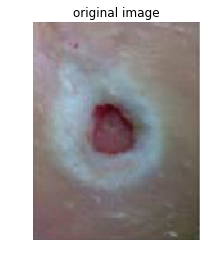

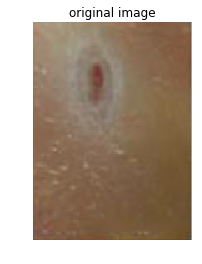

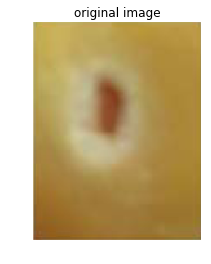

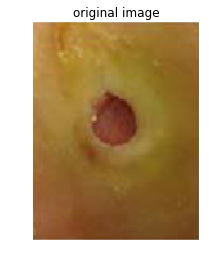

In [5]:
all_imgs=[]
for one in g1:
    one_f=plot_images(one)
    all_imgs.append(one_f)

In [6]:
def plot_gray_images(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    img_gray = rgb2gray(x)

    plt.imshow(img_gray,cmap = plt.get_cmap('gray'))
    plt.title('gray scale image')
    plt.axis('off')
    plt.show()
    return 

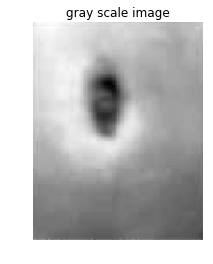

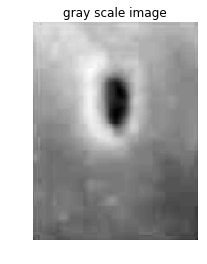

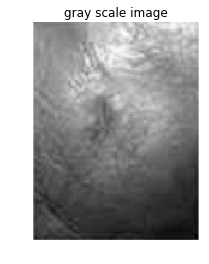

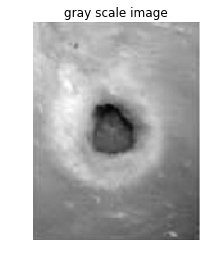

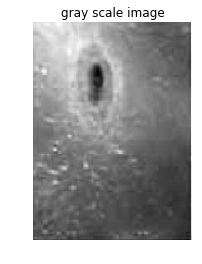

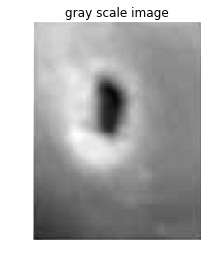

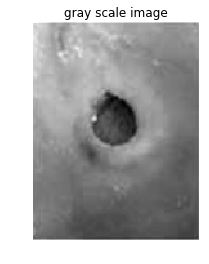

In [7]:
all_imgs=[]
for one in g1:
    one_f=plot_gray_images(one)
    all_imgs.append(one_f)

In [18]:

def histogram_gray_images(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    img_gray = rgb2gray(x)
    noisy_image = img_as_ubyte(img_gray)

    hist = np.histogram(noisy_image, bins=np.arange(0, 255))
    plt.plot(hist[1][:-1], hist[0], lw=2)
    plt.title('Histogram of gray image')
    plt.show()
    
    return 





/home/guttappa/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


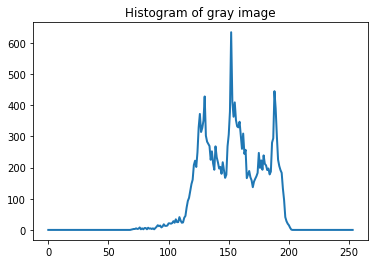

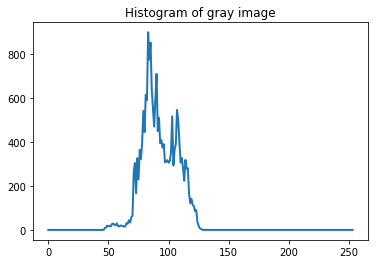

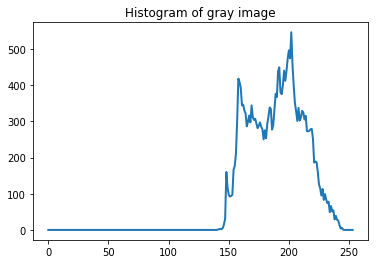

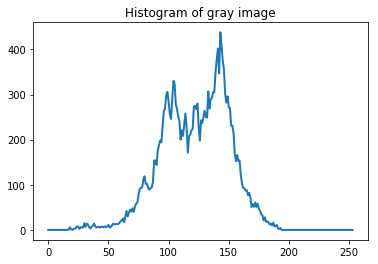

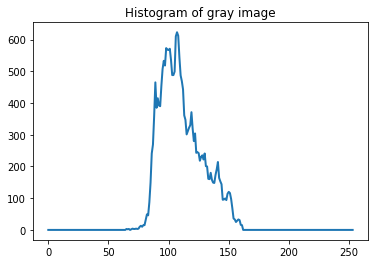

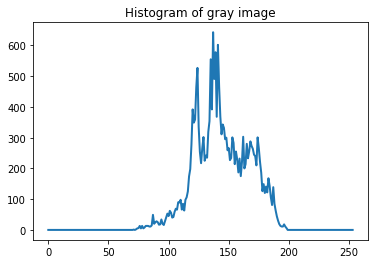

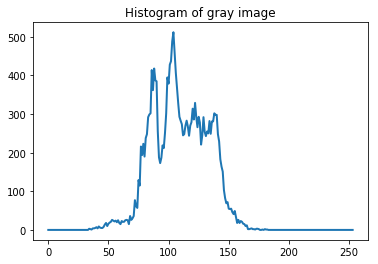

In [19]:
all_imgs=[]
for one in g1:
    one_f=histogram_gray_images(one)
    all_imgs.append(one_f)

In [8]:
# Preprocessing
def resize_image(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    img_gray = rgb2gray(x)

    noisy_image = img_as_ubyte(img_gray)
    noise = np.random.random(noisy_image.shape)
    noisy_image[noise > 0.99] = 255
    noisy_image[noise < 0.01] = 0
    noise_rem = median(noisy_image, disk(1))
    fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    ax[0].set_title('Noisy image')

    ax[1].imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
    ax[1].set_title('Median $r=1$')

    ax[2].imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
    ax[2].set_title('Median $r=5$')

    ax[3].imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
    ax[3].set_title('Median $r=20$')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()
    return 

/home/guttappa/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


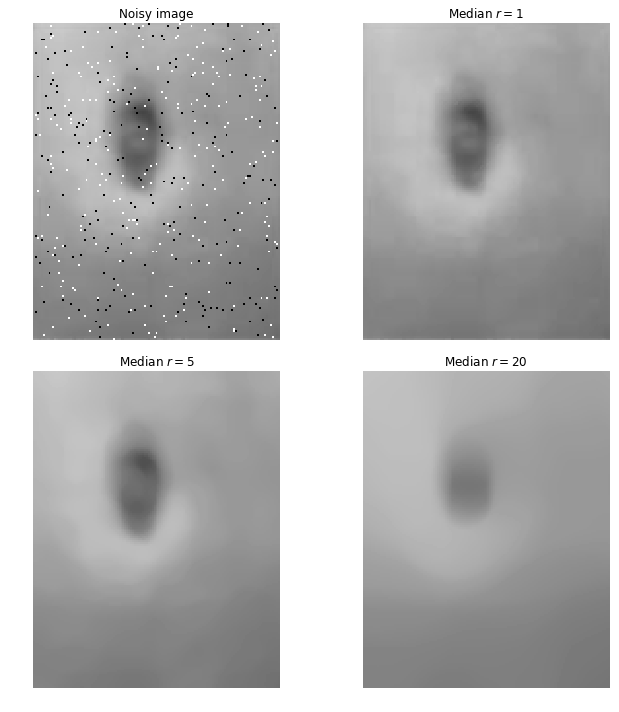

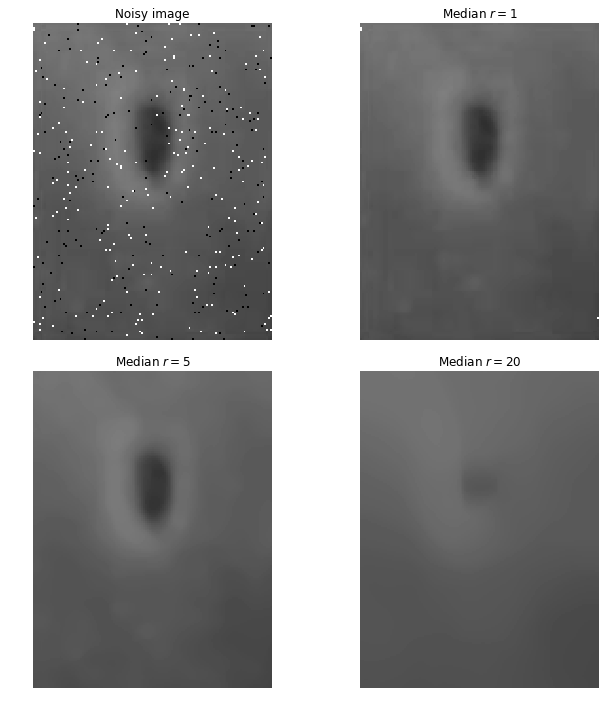

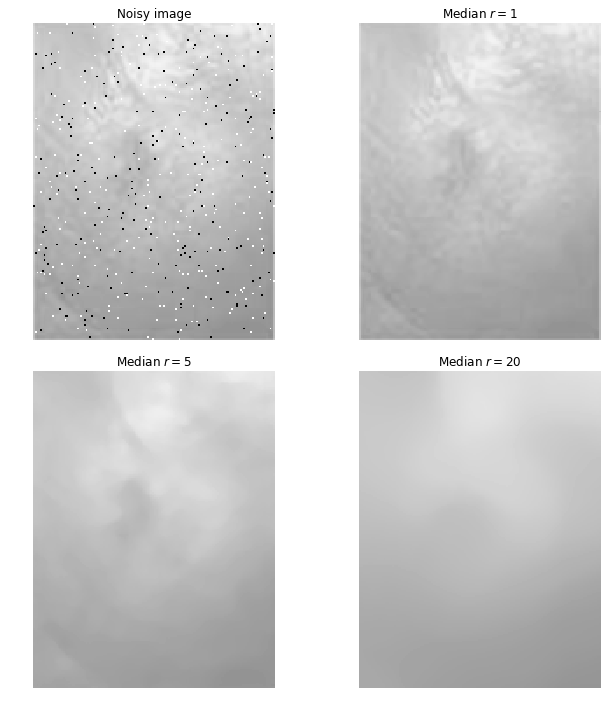

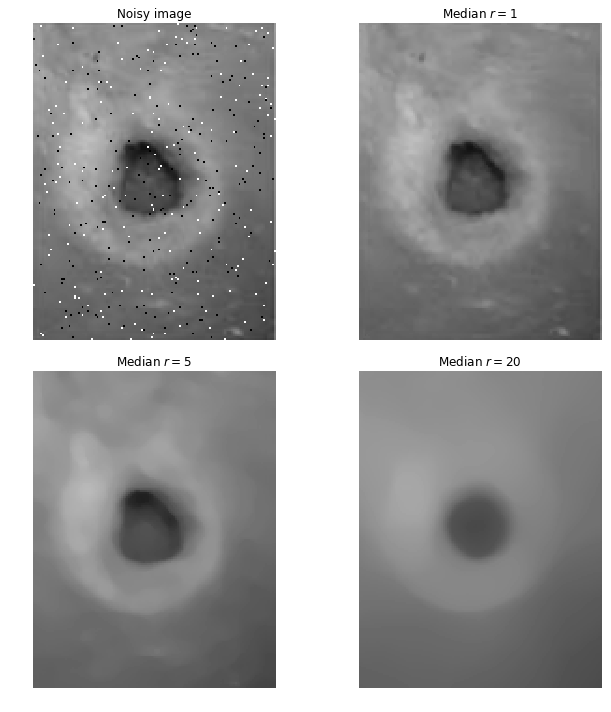

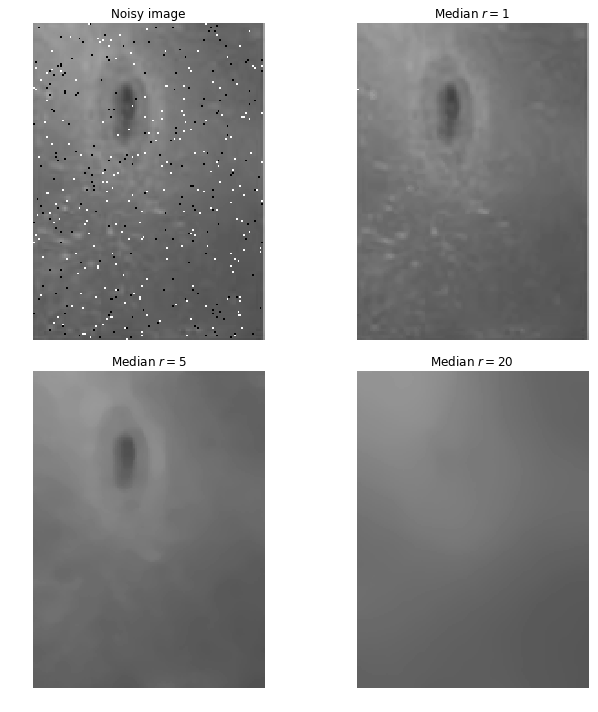

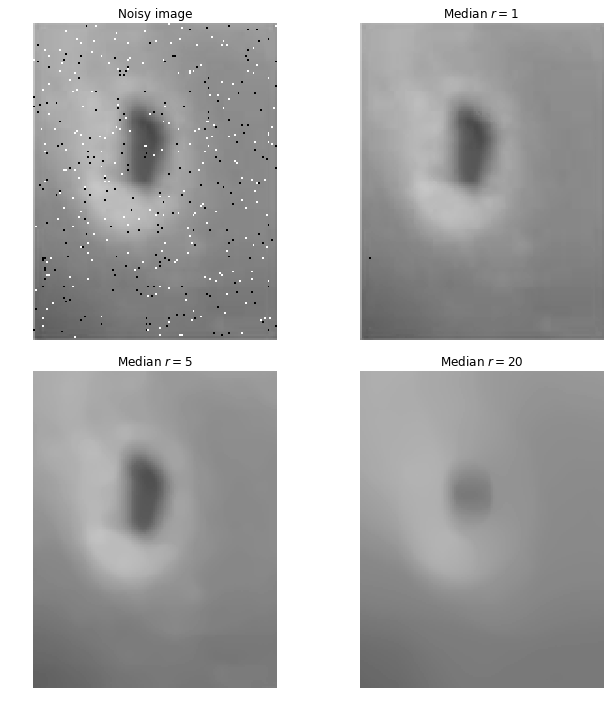

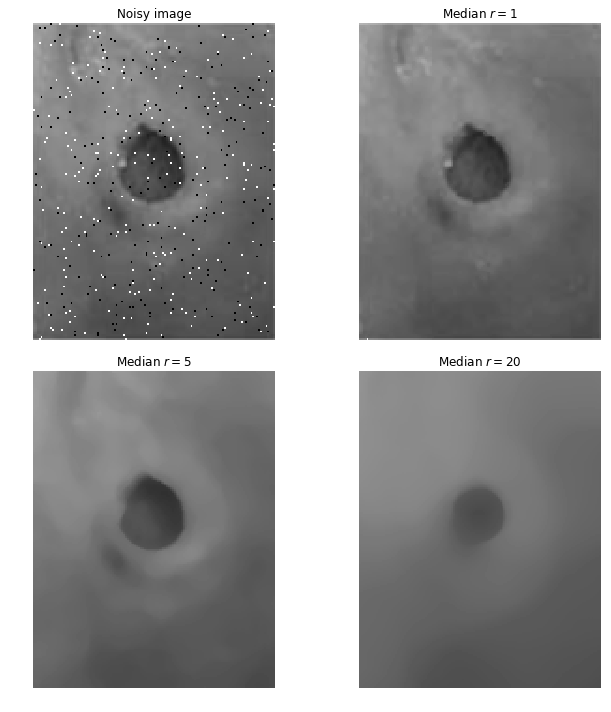

In [9]:
all_imgs=[]
for one in g1:
    one_f= resize_image(one)
    all_imgs.append(one_f)

In [10]:
### canny edge detection
def canny_edge_detection(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    gray = rgb2gray(x)
    noisy_image = img_as_ubyte(gray)
    noise = np.random.random(noisy_image.shape)
    noisy_image[noise > 0.98] = 255
    noisy_image[noise < 0.01] = 0
    noise_rem = median(noisy_image, disk(1))
    
    edges = canny(noise_rem)
    selem = disk(3)
    eroded = dilation(edges, selem)
    plt.subplot(1,2,1)
    plt.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.title('Canny detector')
    
    plt.subplot(1,2,2)
    plt.imshow(eroded, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.title('dilated image')
    plt.show()
    return

/home/guttappa/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


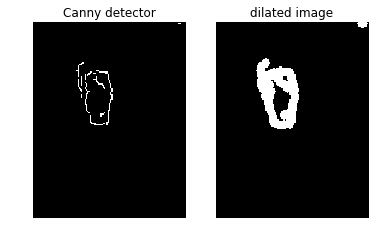

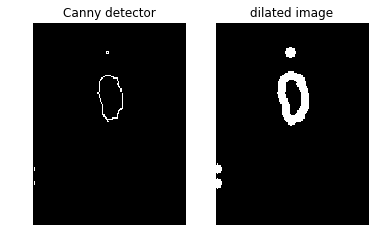

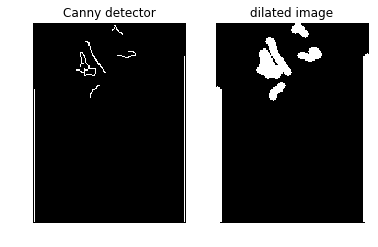

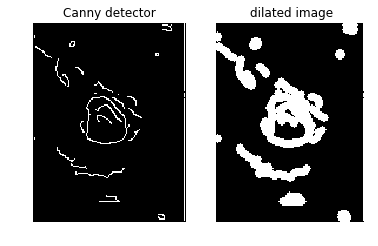

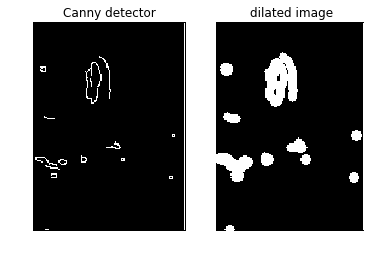

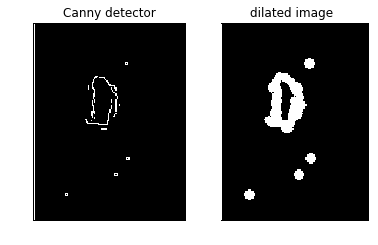

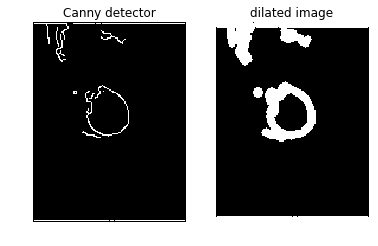

In [11]:
all_imgs=[]
for one in g1:
    one_f= canny_edge_detection(one)
    all_imgs.append(one_f)

In [14]:
def filling_holes(x):
    '''
    loop to plot original and gray iamges
    '''
    name=x
    x = io.imread(name)
    gray = rgb2gray(x)
    ###filtering of image
    
    noisy_image = img_as_ubyte(gray)
    noise = np.random.random(noisy_image.shape)
    noisy_image[noise > 0.98] = 255
    noisy_image[noise < 0.01] = 0
    noise_rem = median(noisy_image, disk(1))
    ###edge detection
    
    edges = canny(gray)
    
    #####dilation
    
    selem = disk(2)
    eroded = dilation(edges, selem)
    closed = closing(eroded,selem)
    ###filling holes
    
    fill_coins = ndi.binary_fill_holes(closed)

    plt.subplot(2,2,1)
    plt.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.title('Filling the holes')
    
    ###removing small objects
    coins_cleaned = morphology.remove_small_objects(fill_coins, 700)

    
    plt.subplot(2,2,2)
    plt.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
    plt.axis('off')
    plt.title('Removing small objects')
    ###tgresholding
    
    thresh = threshold_mean(coins_cleaned)
    binary = coins_cleaned <thresh

    ###segmentation final
    
    wound_edges = segmentation.mark_boundaries(gray, binary)
    wound =  binary-wound_edges[:,:,1]
    
    plt.subplot(223)
    plt.imshow(binary, cmap='gray')
    plt.title('thresholded wound image')
    plt.axis('off')
    plt.subplot(224)
    plt.imshow(wound_edges)
    plt.title('segmented wound image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    ###geometrical features
    
    properties = measure.regionprops(binary.astype(int))
    print("area=",[prop.area for prop in properties])
    print("perimeter=",[prop.perimeter for prop in properties])
    print("centroid=",[prop.centroid for prop in properties])
    
    ####statistical features
    
    entrp = entropy( binary,disk(5))
    ent_mean = np.mean(entrp)
    print("entropy=",ent_mean)
    selem = disk(20)
    normal_result = rank.mean( binary, selem=selem)
    m_mean = np.mean( normal_result)
    print("mean=", m_mean)

    return

/home/guttappa/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/guttappa/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


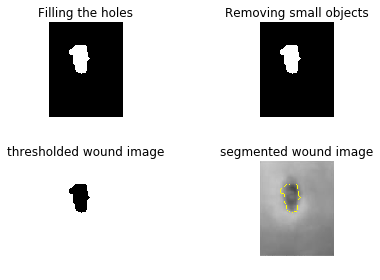

area= [19527]
perimeter= [730.3675323681472]
centroid= [(82.18113381471808, 63.59963127976648)]
entropy= 0.04293560517678865
mean= 240.41225061591228


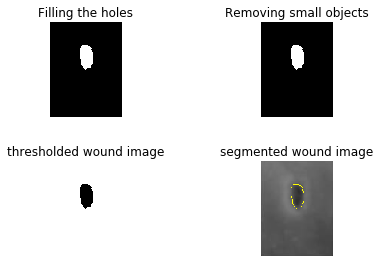

area= [20240]
perimeter= [700.9116882454314]
centroid= [(83.88888339920949, 62.469367588932805)]
entropy= 0.03327789935146115
mean= 245.1782625225739


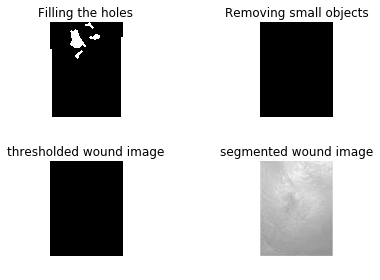

area= []
perimeter= []
centroid= []
entropy= 0.0
mean= 0.0


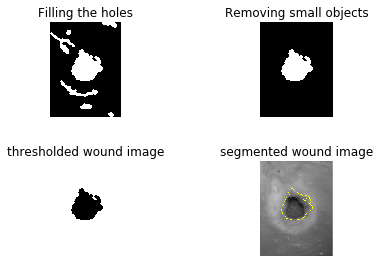

area= [20033]
perimeter= [812.0426765808692]
centroid= [(84.96455847851045, 64.54674786602106)]
entropy= 0.05504751807513262
mean= 230.99529411764706


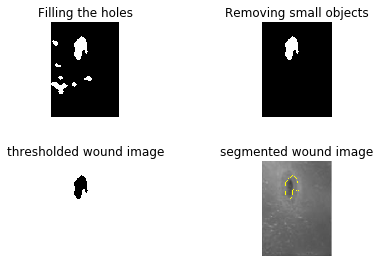

area= [21382]
perimeter= [730.3675323681471]
centroid= [(87.82831353474886, 63.338836404452344)]
entropy= 0.0340370687409567
mean= 246.63345099103992


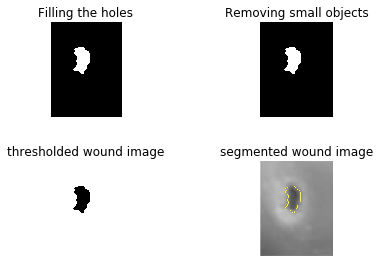

area= [20965]
perimeter= [743.6812408671319]
centroid= [(84.83734796088719, 64.80257572144049)]
entropy= 0.03936475567953621
mean= 243.22093764223942


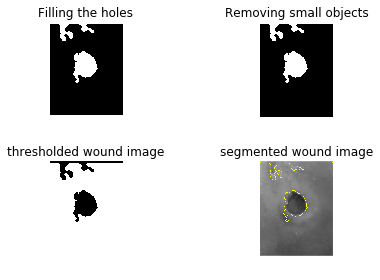

area= [19110]
perimeter= [929.8010819142764]
centroid= [(89.00005232862375, 65.11773940345368)]
entropy= 0.12549834986137592
mean= 224.19577083620018


In [15]:
all_imgs=[]
for one in g1:
    one_f= filling_holes(one)
    all_imgs.append(one_f)

In [251]:
%matplotlib


Using matplotlib backend: Qt5Agg


In [252]:
%matplotlib qt5